## Lasso regression for sparse data

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import class_FM as FM
from sklearn import preprocessing
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


### Initialize factorial model and sample dataset for k=3

In [4]:
n = 1000
k = 3
degree = 3
sigma = 0.1
sparsity = 0.5

fm = FM.FactorialModel(
    n=n,
    k=k,
    degree=degree,
    sigma=sigma,
    sparsity=sparsity,
    beta_seed=42,
)
t, y = fm.sample(seed=0)


### Fit Lasso regression with cross validation for alpha

In [5]:
pf = preprocessing.PolynomialFeatures(
    degree=degree, interaction_only=True, include_bias=True,
)
T = pf.fit_transform(t)
T_train, T_test, y_train, y_test = train_test_split(T, y, test_size=0.2, random_state=42)
alpha_cv = [0.001, 0.01, 0.1, 0.5]
model = LassoCV(alphas=alpha_cv, cv=5, random_state=42)
model.fit(T_train, y_train)
print(f'alpha={model.alpha_}\nbetas={model.coef_}')

y_pred = model.predict(T_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of y: {mse}")

beta_actual = fm.beta
beta_hat = model.coef_
mse_beta = mean_squared_error(beta_actual, beta_hat)
print(f"Mean Squared Error of beta: {mse_beta}")

alpha=0.001
betas=[ 0.         -0.4637746   0.          0.00316037 -0.8622292  -0.00868518
  0.03107943 -0.11330536]
Mean Squared Error of y: 0.0101635675576649
Mean Squared Error of beta: 0.00020646692428272218


In [14]:
t

array([[1., 0., 0.],
       [0., 1., 1.],
       [1., 1., 1.],
       ...,
       [0., 1., 0.],
       [1., 0., 1.],
       [0., 0., 0.]], dtype=float32)

In [15]:
T[0]

array([1., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Compute expected outcomes as linear combinations of betas

In [5]:
betas = model.coef_
beta_mask = pf.fit_transform(pf.powers_)
expected_outcomes = beta_mask @ betas
print(f'expected_outcomes={np.round(expected_outcomes,2)}')

expected_outcomes=[ 0.   -1.04  0.    0.   -2.98 -1.04  0.1  -3.17]


### Cluster treatment combinations by expected outcomes

In [12]:
for i in range(1, 2**k):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(expected_outcomes.reshape(-1, 1))
    score = kmeans.score(expected_outcomes.reshape(-1, 1))
    print(f'Max clusters: {i}; cluster labels: {kmeans.labels_}; score: {score:.2f}')

Max clusters: 1; cluster labels: [0 0 0 0 0 0 0 0]; score: -12.87
Max clusters: 2; cluster labels: [1 1 1 1 0 1 1 0]; score: -1.55
Max clusters: 3; cluster labels: [1 2 1 1 0 2 1 0]; score: -0.03
Max clusters: 4; cluster labels: [1 2 1 1 0 2 1 3]; score: -0.01
Max clusters: 5; cluster labels: [1 2 1 1 0 2 4 3]; score: -0.00
Max clusters: 6; cluster labels: [1 5 1 1 0 2 4 3]; score: -0.00
Max clusters: 7; cluster labels: [6 5 6 1 0 2 4 3]; score: -0.00


/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

### Plot betas and expected outcomes

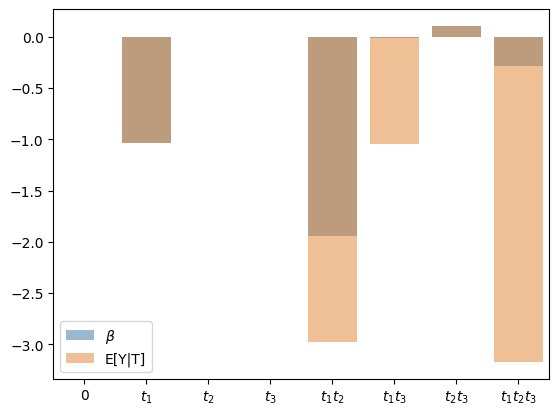

In [13]:
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_2 t_3$",
        r"$t_1 t_2 t_3$",
    ],
    y=betas,
    alpha=0.5,
    label=r"$\beta$",
)

_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_2 t_3$",
        r"$t_1 t_2 t_3$",
    ],
    y=expected_outcomes,
    alpha=0.5,
    label=r"E[Y|T]",
)

### Factorial model and sample dataset for k=4

In [14]:
n = 1000
k = 4
degree = 4
sigma = 0.1
sparsity = 0.5

fm = FM.FactorialModel(
    n=n,
    k=k,
    degree=degree,
    sigma=sigma,
    sparsity=sparsity,
    beta_seed=42,
)
t, y = fm.sample(seed=0)

In [15]:
# Fit Lasso regression with cross validation for alpha
pf = preprocessing.PolynomialFeatures(
    degree=degree, interaction_only=True, include_bias=True,
)
T = pf.fit_transform(t)
T_train, T_test, y_train, y_test = train_test_split(T, y, test_size=0.2, random_state=42)
alpha_cv = [0.001, 0.01, 0.1, 0.5]
model = LassoCV(alphas=alpha_cv, cv=5, random_state=42)
model.fit(T_train, y_train)
print(f'alpha={model.alpha_}\nbetas={model.coef_}')

y_pred = model.predict(T_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of y: {mse}")

beta_actual = fm.beta
beta_hat = model.coef_
mse_beta = mean_squared_error(beta_actual, beta_hat)
print(f"Mean Squared Error of beta: {mse_beta}")

alpha=0.001
betas=[ 0.         -1.0354477   0.7413759   0.9281001   0.         -0.01766573
  0.12114649 -0.309656    0.          0.01041429  0.01005618 -0.
 -0.01030038 -0.          0.40797812 -0.8193736 ]
Mean Squared Error of y: 0.00993303315356764
Mean Squared Error of beta: 0.0003996259765699506


In [16]:
# Compute expected outcomes as linear combinations of betas
betas = model.coef_
beta_mask = pf.fit_transform(pf.powers_)
expected_outcomes = beta_mask @ betas
print(f'expected_outcomes={np.round(expected_outcomes,2)}')

expected_outcomes=[ 0.   -1.04  0.74  0.93  0.   -0.31  0.01 -1.35  1.67  0.75  0.94  0.74
 -0.62 -0.29  2.1   0.03]


In [17]:
print(betas.shape, expected_outcomes.shape)

(16,) (16,)


In [18]:
# Cluster treatment combinations by expected outcomes
for i in range(1, 2**k):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(expected_outcomes.reshape(-1, 1))
    score = kmeans.score(expected_outcomes.reshape(-1, 1))
    print(f'Max clusters: {i}; cluster labels: {kmeans.labels_}; score: {score:.2f}')

/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

Max clusters: 1; cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]; score: -12.88
Max clusters: 2; cluster labels: [0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0]; score: -3.79
Max clusters: 3; cluster labels: [0 2 1 1 0 0 0 2 1 1 1 1 2 0 1 0]; score: -2.15
Max clusters: 4; cluster labels: [3 0 1 1 3 3 3 0 2 1 1 1 0 3 2 3]; score: -0.53
Max clusters: 5; cluster labels: [3 4 1 1 3 0 3 4 2 1 1 1 0 0 2 3]; score: -0.25
Max clusters: 6; cluster labels: [0 3 2 2 0 4 0 3 5 2 2 2 4 4 1 0]; score: -0.16
Max clusters: 7; cluster labels: [3 4 1 1 3 5 3 4 6 1 1 1 0 5 2 3]; score: -0.09
Max clusters: 8; cluster labels: [4 6 2 2 4 1 4 3 0 2 2 2 7 1 5 4]; score: -0.04
Max clusters: 9; cluster labels: [3 8 7 1 3 5 3 4 6 7 1 7 0 5 2 3]; score: -0.00
Max clusters: 10; cluster labels: [3 8 7 1 3 5 9 4 6 7 1 7 0 5 2 9]; score: -0.00
Max clusters: 11; cluster labels: [ 3  8  7  1  3  5  9  4  6  7  1  7  0 10  2  9]; score: -0.00
Max clusters: 12; cluster labels: [ 9  7  6  1  9  4  0  2  3 11  1  6  8 10  5  0]; score

/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Max clusters: 14; cluster labels: [ 3  8  7 13  3  5  9  4  6 12  1  7  0 10  2 11]; score: -0.00


/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Max clusters: 15; cluster labels: [ 3  8  7 13  3  5  9  4  6 12  1 14  0 10  2 11]; score: -0.00


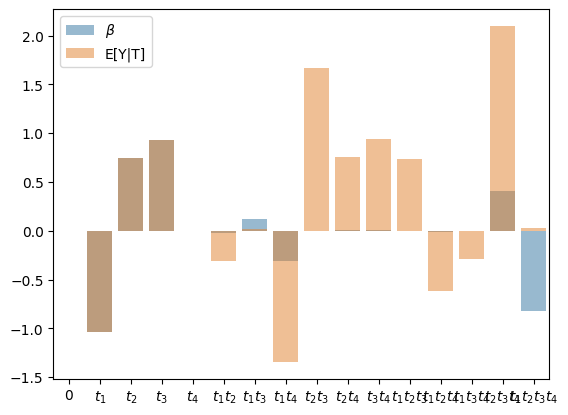

In [19]:
# Plot betas and expected outcomes
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_4$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_1 t_4$",
        r"$t_2 t_3$",
        r"$t_2 t_4$",
        r"$t_3 t_4$",
        r"$t_1 t_2 t_3$",
        r"$t_1 t_2 t_4$",
        r"$t_1 t_3 t_4$",
        r"$t_2 t_3 t_4$",
        r"$t_1 t_2 t_3 t_4$",
    ],
    y=betas,
    alpha=0.5,
    label=r"$\beta$",
)

_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_4$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_1 t_4$",
        r"$t_2 t_3$",
        r"$t_2 t_4$",
        r"$t_3 t_4$",
        r"$t_1 t_2 t_3$",
        r"$t_1 t_2 t_4$",
        r"$t_1 t_3 t_4$",
        r"$t_2 t_3 t_4$",
        r"$t_1 t_2 t_3 t_4$",
    ],
    y=expected_outcomes,
    alpha=0.5,
    label=r"E[Y|T]",
)

### Factorial model and sample dataset for k=5

In [20]:
n = 1000
k = 5
degree = 5
sigma = 0.1
sparsity = 0.5

fm = FM.FactorialModel(
    n=n,
    k=k,
    degree=degree,
    sigma=sigma,
    sparsity=sparsity,
    beta_seed=42,
)
t, y = fm.sample(seed=0)

In [21]:
# Fit Lasso regression with cross validation for alpha
pf = preprocessing.PolynomialFeatures(
    degree=degree, interaction_only=True, include_bias=True,
)
T = pf.fit_transform(t)
T_train, T_test, y_train, y_test = train_test_split(T, y, test_size=0.2, random_state=42)
alpha_cv = [0.001, 0.01, 0.1, 0.5]
model = LassoCV(alphas=alpha_cv, cv=5, random_state=42)
model.fit(T_train, y_train)
print(f'alpha={model.alpha_}\nbetas={model.coef_}')

y_pred = model.predict(T_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of y: {mse}")

beta_actual = fm.beta
beta_hat = model.coef_
mse_beta = mean_squared_error(beta_actual, beta_hat)
print(f"Mean Squared Error of beta: {mse_beta}")

alpha=0.001
betas=[ 0.00000000e+00 -1.17758205e-02  7.47593224e-01  1.20076723e-02
  5.19280788e-04  5.94388088e-03  0.00000000e+00 -5.97296134e-02
  0.00000000e+00 -0.00000000e+00  2.68394966e-02  1.44616505e-02
 -0.00000000e+00  0.00000000e+00  3.70920092e-01 -8.69628668e-01
  4.27585363e-01  0.00000000e+00  1.46394283e-01 -7.61260558e-03
 -0.00000000e+00  0.00000000e+00  1.10224247e+00 -0.00000000e+00
 -3.35493952e-01 -3.02472621e-01 -0.00000000e+00  4.02714405e-03
  1.33731395e-01 -1.29754692e-01 -6.84245676e-02 -0.00000000e+00]
Mean Squared Error of y: 0.011468420770737033
Mean Squared Error of beta: 0.0192875936627388


In [22]:
# Compute expected outcomes as linear combinations of betas
betas = model.coef_
beta_mask = pf.fit_transform(pf.powers_)
expected_outcomes = beta_mask @ betas
print(f'expected_outcomes={np.round(expected_outcomes,2)}')

expected_outcomes=[ 0.   -0.01  0.75  0.01  0.    0.01  0.74 -0.06 -0.01 -0.01  0.79  0.76
  0.75  0.01  0.39 -0.86  1.14  0.75  0.89 -0.07  0.32 -0.87  1.9   1.16
 -0.44 -0.78  2.25  1.67 -0.17 -0.99  0.7   1.21]


In [23]:
print(betas.shape, expected_outcomes.shape)

(32,) (32,)


In [24]:
# Cluster treatment combinations by expected outcomes
for i in range(1, 2**k):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(expected_outcomes.reshape(-1, 1))
    score = kmeans.score(expected_outcomes.reshape(-1, 1))
    print(f'Max clusters: {i}; cluster labels: {kmeans.labels_}; score: {score:.2f}')

/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

Max clusters: 1; cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]; score: -19.45
Max clusters: 2; cluster labels: [1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0]; score: -6.12
Max clusters: 3; cluster labels: [1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 2 0 1 1 2 2 1 1 0 0]; score: -3.23
Max clusters: 4; cluster labels: [1 1 3 1 1 1 3 1 1 1 3 3 3 1 1 0 3 3 3 1 1 0 2 3 0 0 2 2 1 0 3 3]; score: -1.01
Max clusters: 5; cluster labels: [2 2 4 2 2 2 4 2 2 2 4 4 4 2 4 0 1 4 4 2 2 0 3 1 0 0 3 3 2 0 4 1]; score: -0.64
Max clusters: 6; cluster labels: [1 1 0 1 1 1 0 1 1 1 0 0 0 1 5 4 3 0 0 1 5 4 2 3 1 4 2 2 1 4 0 3]; score: -0.40
Max clusters: 7; cluster labels: [0 0 3 0 0 0 3 0 0 0 3 3 3 0 6 2 1 3 3 0 6 2 4 1 5 2 4 4 0 2 3 1]; score: -0.25
Max clusters: 8; cluster labels: [2 2 0 2 2 2 0 2 2 2 0 0 0 2 6 1 4 0 0 2 6 1 3 4 7 1 5 3 2 1 0 4]; score: -0.10
Max clusters: 9; cluster labels: [0 0 1 0 0 0 1 0 0 0 1 1 1 0 6 4 3 1 1 0 6 4 8 3 7 4 2 5 0 4 1

/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

Max clusters: 14; cluster labels: [ 5  5  0  5  5  5  0 13  5  5  0  0  0  5  6  3  4  0  9 13  6  3  2  4
  8 12  7 10  1 11  0  4]; score: -0.01
Max clusters: 15; cluster labels: [ 5  5  4  5  5  5  4 13  5  5  4  4  4  5 14  9  1  4 12 13  0  9  6  1
  7  2  3  8 10 11  4  1]; score: -0.01
Max clusters: 16; cluster labels: [ 1  1  2  1  1  1 11 13  1  1  2  2  2  1  7  3  5  2 12 13 15  3  8  5
  6 14  0  4  9 10 11  5]; score: -0.00
Max clusters: 17; cluster labels: [ 6  6  4  6  6  6 16 13  6  6  4  4  4  6 14 12  1  4 11 13  5 12  3  1
  9  2  8  7  0 10 16 15]; score: -0.00
Max clusters: 18; cluster labels: [ 5  5  0  5  5  5  0 13  5  5 17  0  0  5 15  3  4  0  9 13  6  3  2  4
  8 12  7 10  1 11 14 16]; score: -0.00
Max clusters: 19; cluster labels: [18 18  4 10 18 10  4  2 18 18 17  4  4 10 14  5  1  4 11  2  7  5  6  1
  0 13  3  8 12  9 16 15]; score: -0.00
Max clusters: 20; cluster labels: [17 17 19  0 17  0  4 12 17 17 14 19 19  0 16  2 13 19 10 12  6  2  3 13
  5 15  7  

/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Max clusters: 22; cluster labels: [17 21  0  6 17 17 20 12 21 21 18  0  0  6 14  3 19  0 10 12  5  3  2  4
  8 13  7  9  1 11 15 16]; score: -0.00


/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Max clusters: 23; cluster labels: [ 0 21 18 20  0  0  8 13 21 21 15 22 18 20 14  9 19 18  3 13  5  9 10  6
  7  2  4  1 11 12 17 16]; score: -0.00
Max clusters: 24; cluster labels: [17 21  0  6 17 17 20 12 21 21 18 23  0  6 14 22 19  0 10 12  5  3  2  4
  8 13  7  9  1 11 15 16]; score: -0.00
Max clusters: 25; cluster labels: [17 21  0  6 17 17 20 24 21 21 18 23  0  6 14 22 19  0 10 12  5  3  2  4
  8 13  7  9  1 11 15 16]; score: -0.00
Max clusters: 26; cluster labels: [ 1 22 17 20  1 25 14 10 22 22  2 23 17 20  6 21 19 17 13 24 15  9  8  4
  7  3  5  0 12 11 18 16]; score: -0.00


/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

Max clusters: 27; cluster labels: [22 23 12 18 22 26 20 14 23  2 17 24 12 18 16 13 15 12  1 25  4 21  3 19
  6  9  8 10 11  0  7  5]; score: -0.00
Max clusters: 28; cluster labels: [17 21 25  6 17 26 20 24 21 27 18 23  0  6 14 22 19  0 10 12  5  3  2  4
  8 13  7  9  1 11 15 16]; score: -0.00
Max clusters: 29; cluster labels: [17 21 25  6 17 26 20 24 21 27 18 23  0  6 14 22 19 28 10 12  5  3  2  4
  8 13  7  9  1 11 15 16]; score: -0.00
Max clusters: 30; cluster labels: [29 21 25  6 17 26 20 24 21 27 18 23  0  6 14 22 19 28 10 12  5  3  2  4
  8 13  7  9  1 11 15 16]; score: -0.00
Max clusters: 31; cluster labels: [29 21 25  6 17 26 20 24 21 27 18 23  0 30 14 22 19 28 10 12  5  3  2  4
  8 13  7  9  1 11 15 16]; score: -0.00


/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

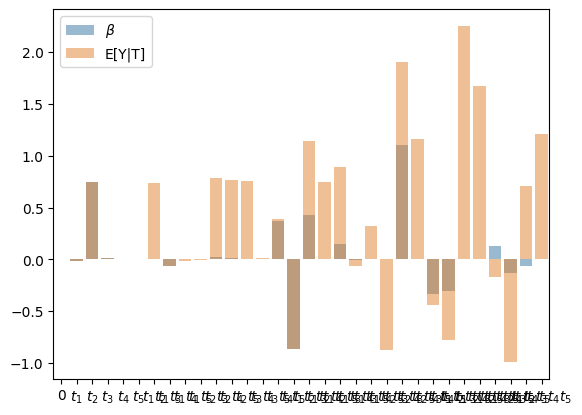

In [25]:
# Plot betas and expected outcomes
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_4$",
        r"$t_5$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_1 t_4$",
        r"$t_1 t_5$",
        r"$t_2 t_3$",
        r"$t_2 t_4$",
        r"$t_2 t_5$",
        r"$t_3 t_4$",
        r"$t_3 t_5$",
        r"$t_4 t_5$",
        r"$t_1 t_2 t_3$",
        r"$t_1 t_2 t_4$",
        r"$t_1 t_2 t_5$",
        r"$t_1 t_3 t_4$",
        r"$t_1 t_3 t_5$",
        r"$t_1 t_4 t_5$",
        r"$t_2 t_3 t_4$",
        r"$t_2 t_3 t_5$",
        r"$t_2 t_4 t_5$",
        r"$t_3 t_4 t_5$",
        r"$t_1 t_2 t_3 t_4$",
        r"$t_1 t_2 t_3 t_5$",
        r"$t_1 t_2 t_4 t_5$",
        r"$t_1 t_3 t_4 t_5$",
        r"$t_2 t_3 t_4 t_5$",
        r"$t_1 t_2 t_3 t_4 t_5$",
    ],
    y=betas,
    alpha=0.5,
    label=r"$\beta$",
)

_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_4$",
        r"$t_5$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_1 t_4$",
        r"$t_1 t_5$",
        r"$t_2 t_3$",
        r"$t_2 t_4$",
        r"$t_2 t_5$",
        r"$t_3 t_4$",
        r"$t_3 t_5$",
        r"$t_4 t_5$",
        r"$t_1 t_2 t_3$",
        r"$t_1 t_2 t_4$",
        r"$t_1 t_2 t_5$",
        r"$t_1 t_3 t_4$",
        r"$t_1 t_3 t_5$",
        r"$t_1 t_4 t_5$",
        r"$t_2 t_3 t_4$",
        r"$t_2 t_3 t_5$",
        r"$t_2 t_4 t_5$",
        r"$t_3 t_4 t_5$",
        r"$t_1 t_2 t_3 t_4$",
        r"$t_1 t_2 t_3 t_5$",
        r"$t_1 t_2 t_4 t_5$",
        r"$t_1 t_3 t_4 t_5$",
        r"$t_2 t_3 t_4 t_5$",
        r"$t_1 t_2 t_3 t_4 t_5$",
    ],
    y=expected_outcomes,
    alpha=0.5,
    label=r"E[Y|T]",
)

### Generate data for m less than sp

In [6]:
#s = sparsity * len(beta)
#if k is 10: 88
# so error low if 88 * log(176) >= 197
def run_generation(n_max, k, sparsity, step):
    mse_dict = {}
    for n in range(20, n_max, step):
        #dictionary for mse's
        
        degree = k
        sigma = 0.1

        fm = FM.FactorialModel(
            n=n,
            k=k,
            degree=degree,
            sigma=sigma,
            sparsity=sparsity,
            beta_seed=42,
        )
        t, y = fm.sample(seed=0)


        pf = preprocessing.PolynomialFeatures(
        degree=degree, interaction_only=True, include_bias=True,
        )
        T = pf.fit_transform(t)
        T_train, T_test, y_train, y_test = train_test_split(T, y, test_size=0.2, random_state=42)
        alpha_cv = [0.001, 0.01, 0.1, 0.5]
        model = LassoCV(alphas=alpha_cv, cv=5, random_state=42, max_iter=10000)
        model.fit(T_train, y_train)
        # print(f'alpha={model.alpha_}\nbetas={model.coef_}')

        y_pred = model.predict(T_test)
        mse = mean_squared_error(y_test, y_pred)
        # print(f"Mean Squared Error of y: {mse}")

        beta_actual = fm.beta
        beta_hat = model.coef_
        mse_beta = mean_squared_error(beta_actual, beta_hat)
        # print(f"Mean Squared Error of beta: {mse_beta}")

        mse_dict[n] = (mse, mse_beta)
    return mse_dict, len(fm.beta)

In [7]:

def draw_charts(mse_dict):
    n = list(mse_dict.keys())
    mse, mse_beta = zip(*mse_dict.values())

    fig, ax1 = plt.subplots()

    # Plot the first line (mse) on the first y-axis
    color = 'tab:red'
    ax1.set_xlabel('n')
    ax1.set_ylabel('mse', color=color)
    ax1.plot(n, mse, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a second y-axis for the second line (mse_beta)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('mse_beta', color=color)
    ax2.plot(n, mse_beta, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # For layout
    plt.title('MSE and MSE_Beta vs n')
    plt.show()

In [8]:
def calc_tipping_point(sparsity, length, k):
    return k * (1-sparsity) * length

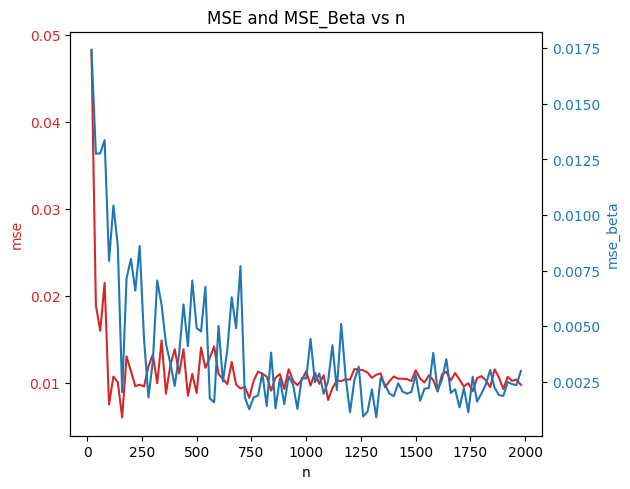

31.999999999999993


In [10]:
n_max = 2000
k = 5
sparsity = 0.8
mse_dict, length = run_generation(n_max, k, sparsity, 20)
draw_charts(mse_dict)
print(calc_tipping_point(sparsity, length, k))

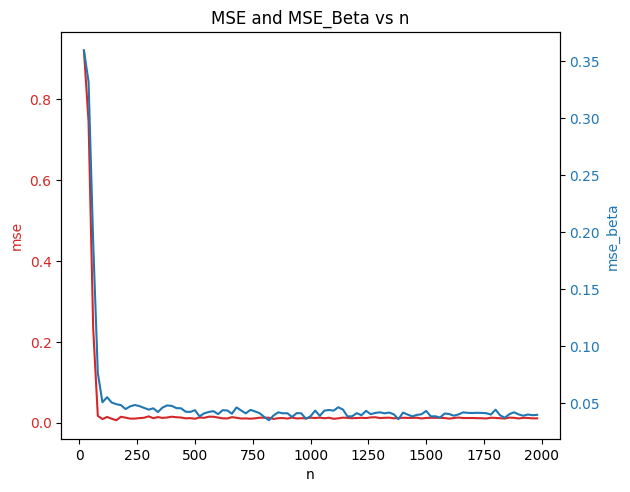

128.0


In [11]:
n_max = 2000
k = 5
sparsity = 0.2
mse_dict, length = run_generation(n_max, k, sparsity, 20)
draw_charts(mse_dict)
print(calc_tipping_point(sparsity, length, k))

/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.172e+00, tolerance: 2.930e+00
  model = cd_fast.enet_coordinate_descent(
/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.375e+00, tolerance: 3.198e+00
  model = cd_fast.enet_coordinate_descent(
/Users/joshuaklivan/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

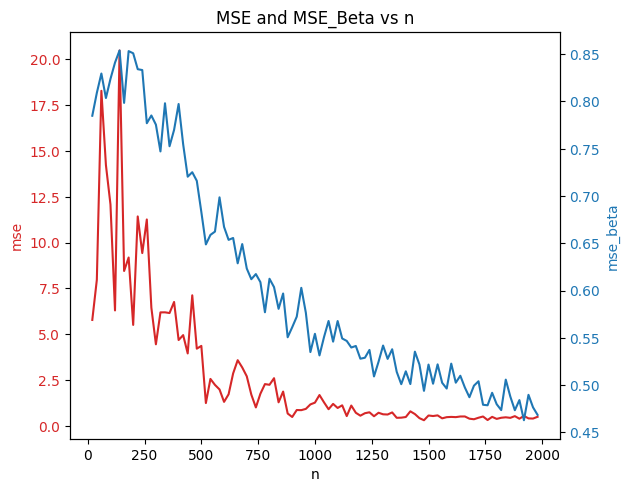

8192.0


In [12]:
n_max = 2000
k = 10
sparsity = 0.2
mse_dict, length = run_generation(n_max, k, sparsity, 20)
draw_charts(mse_dict)
print(calc_tipping_point(sparsity, length, k))

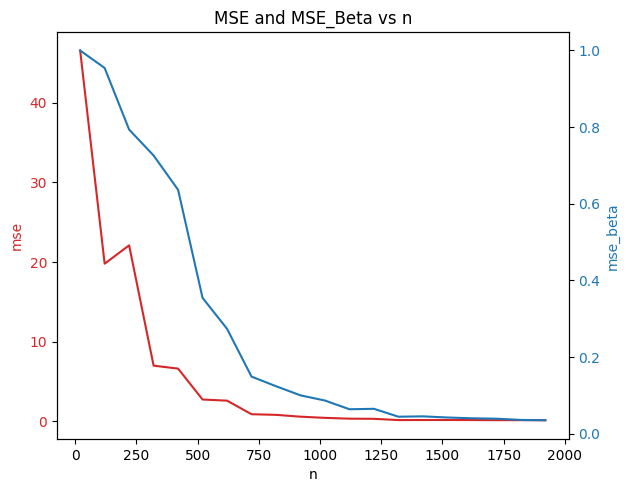

183.05590062804168


In [93]:
n_max = 2000
k = 15
sparsity = 0.05
mse_dict, length = run_generation(n_max, k, sparsity)
draw_charts(mse_dict)
print(calc_tipping_point(sparsity, length))

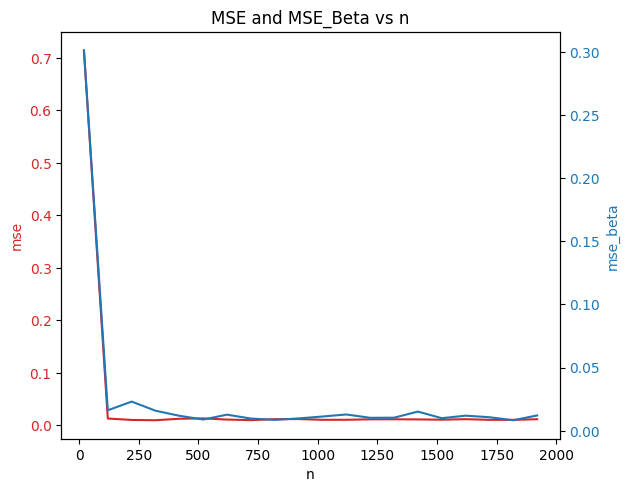

4.2355254994279266


In [94]:
n_max = 2000
k = 5
sparsity = 0.05
mse_dict, length = run_generation(n_max, k, sparsity)
draw_charts(mse_dict)
print(calc_tipping_point(sparsity, length))

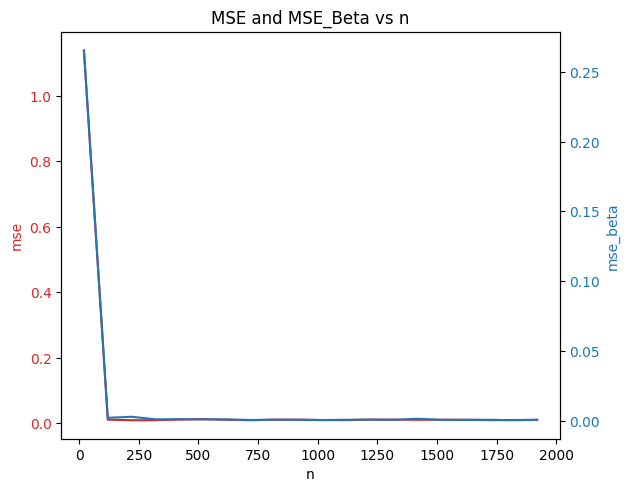

42.35525499427927


In [95]:
n_max = 2000
k = 5
sparsity = 0.5
mse_dict, length = run_generation(n_max, k, sparsity)
draw_charts(mse_dict)
print(calc_tipping_point(sparsity, length))

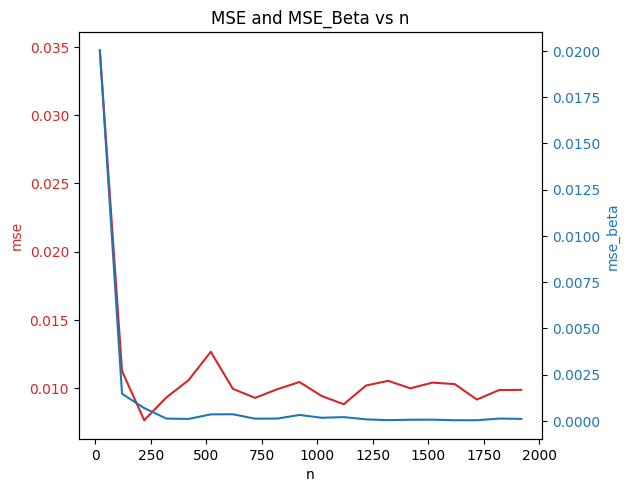

76.23945898970268


In [96]:
n_max = 2000
k = 5
sparsity = 0.9
mse_dict, length = run_generation(n_max, k, sparsity)
draw_charts(mse_dict)
print(calc_tipping_point(sparsity, length))

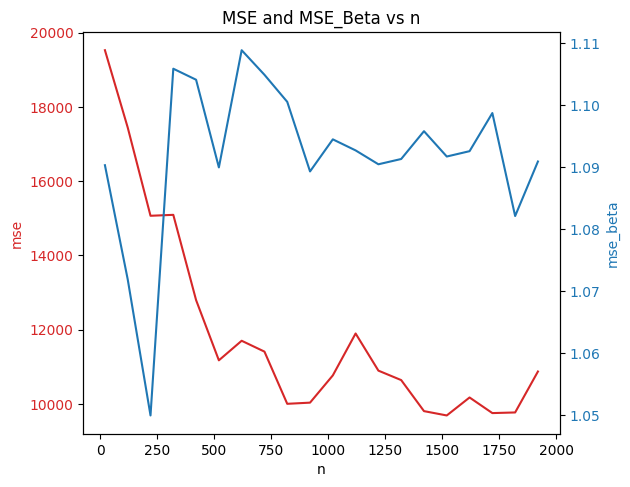

100252.84362319611


In [97]:
n_max = 2000
k = 100
sparsity = 0.05
mse_dict, length = run_generation(n_max, k, sparsity)
draw_charts(mse_dict)
print(calc_tipping_point(sparsity, length))

In [99]:
n_max = 200000
k = 100
sparsity = 0.05
step = 50000
mse_dict, length = run_generation(n_max, k, sparsity, step)
draw_charts(mse_dict)
print(calc_tipping_point(sparsity, length))